# Linear Regression
<img src="pics\lr.pic1.png" width="600">

## Mean Squared Error
$$MSE =  \frac{1}{N} \sum_{i=1}^{n} (y_i - (m x_i + b))^2$$ <br>
N is the total number of observations (data points) <br>
$\frac{1}{N} \sum_{i=1}^{n}$ is the mean <br>
$y_i$ is the actual value of an observation and $mx_i+b$ is our prediction

## Gradient descent (to minimize MSE)


<img src="pics\lr.pic2.png" width="400">

Squared Error: $f(m,b) = (y_i - (mx_i + b))^2 = A(B(m,b))$ <br>

\begin{align}\begin{aligned}
\frac{df}{dm} = 2(y_i - (mx_i + b)) \cdot -x_i\\\frac{df}{db} =  2(y_i - (mx_i + b)) \cdot -1
\end{aligned}\end{align}

\begin{split}\begin{align}
f'(m,b) =
  \begin{bmatrix}
    \frac{df}{dm}\\
    \frac{df}{db}\\
  \end{bmatrix}
&=
  \begin{bmatrix}
    \frac{1}{N} \sum -x_i \cdot 2(y_i - (mx_i + b)) \\
    \frac{1}{N} \sum -1 \cdot 2(y_i - (mx_i + b)) \\
  \end{bmatrix}\\
&=
  \begin{bmatrix}
     \frac{1}{N} \sum -2x_i(y_i - (mx_i + b)) \\
     \frac{1}{N} \sum -2(y_i - (mx_i + b)) \\
  \end{bmatrix}
\end{align}\end{split}
## Update Rules
<img src="pics\lr.pic3.png" width="800">

In [32]:
class LinearRegressor:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.W = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            # X is 2D array, 
            # W, dw is 1D array
            # b, db is 0D array
            y_hat = np.dot(X, self.W) + self.b # 1D array
            dW = np.dot(X.T,(y_hat-y))*2/n_samples #1D array
            db = sum((y_hat-y))*2/n_samples #scalar
            
            self.W -= self.lr*dW
            self.b -= self.lr*db
            
        pass
    
    def predict(self, X):
        y_hat = np.dot(X, self.W) + self.b
        return y_hat
    
    def MSE(self, X, y):
        mse = sum(np.square((self.predict(X) - y)))/X.shape[0]
        return mse
    

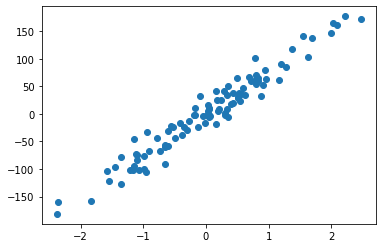

In [20]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X, y = datasets.make_regression(n_samples=100, 
                                n_features=1, 
                                noise=20, 
                                random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2,
                                                    random_state=1234)
fig = plt.figure(figsize=(6,4))
plt.scatter(X[:,0], y)
plt.show()

[  89.5978923    33.21708479  -58.51318402  -82.91713341   40.69772522
 -100.73717846   -1.65856494  163.94385144    5.26394625  -77.78704394
    9.20267903   36.86598297   -5.54348338   31.43120085   64.53968736
  -44.1299115   -74.76820338   50.92876904   28.14443518   17.68768961]
[  90.07911867   65.22240301  -45.69498186  -82.49167298   20.93910431
  -73.92513193  -14.90998903  151.65799643   14.01724561 -102.29561058
   15.56851863   41.60448602   26.20320259   38.12125411   37.38360674
  -37.35823254  -83.12683724   26.30425075   38.13183211   29.45312701]
305.77413160852427


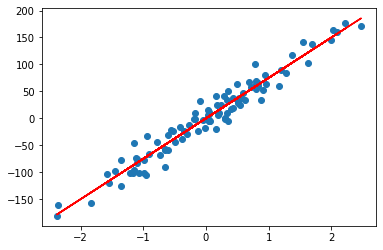

In [46]:
model = LinearRegressor(lr=0.01)
model.fit(X_train, y_train)
print(y_test)
print(model.predict(X_test))
print(model.MSE(X_test, y_test))

plt.plot(X, model.predict(X), color='red')
plt.scatter(X, y)